In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.model_selection import StratifiedKFold
from matplotlib.font_manager import FontProperties
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv("AI_Human.csv")

In [3]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# Text

In [4]:
for text in range (1):
    print(text,df['text'][text])


0 Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.

In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article,

In [5]:
df['len']=df['text'].apply(len)

In [6]:
df

,text,generated,len
0,Cars. Cars have been around since they became ...,0.0,3289
1,Transportation is a large necessity in most co...,0.0,2738
2,"""America's love affair with it's vehicles seem...",0.0,4428
3,How often do you ride in a car? Do you drive a...,0.0,4013
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698
...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968
487231,The whole purpose of democracy is to create a ...,0.0,2319
487232,I firmly believe that governments worldwide sh...,1.0,2392
487233,I DFN't agree with this decision because a LFT...,0.0,1668


# Simple ETL

In [7]:
human=df[df['generated']==1]
ai=df[df['generated']==0]

In [8]:
total_reviews = len(human) + len(ai)
percentage_negative = (len(human) / total_reviews) * 100

print(f"The dataset contains {len(human)} texts written by humans.")
print(f"The dataset contains {len(ai)} texts generated by AI.")
print(f"We have a well-balanced database.")

The dataset contains 181438 texts written by humans.
The dataset contains 305797 texts generated by AI.
We have a well-balanced database.


In [9]:
df['generated_cor'] = df['generated'].replace({
    1: 'Human',
    0: 'AI'
})

In [10]:
df

,text,generated,len,generated_cor
0,Cars. Cars have been around since they became ...,0.0,3289,AI
1,Transportation is a large necessity in most co...,0.0,2738,AI
2,"""America's love affair with it's vehicles seem...",0.0,4428,AI
3,How often do you ride in a car? Do you drive a...,0.0,4013,AI
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,AI
...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968,AI
487231,The whole purpose of democracy is to create a ...,0.0,2319,AI
487232,I firmly believe that governments worldwide sh...,1.0,2392,Human
487233,I DFN't agree with this decision because a LFT...,0.0,1668,AI


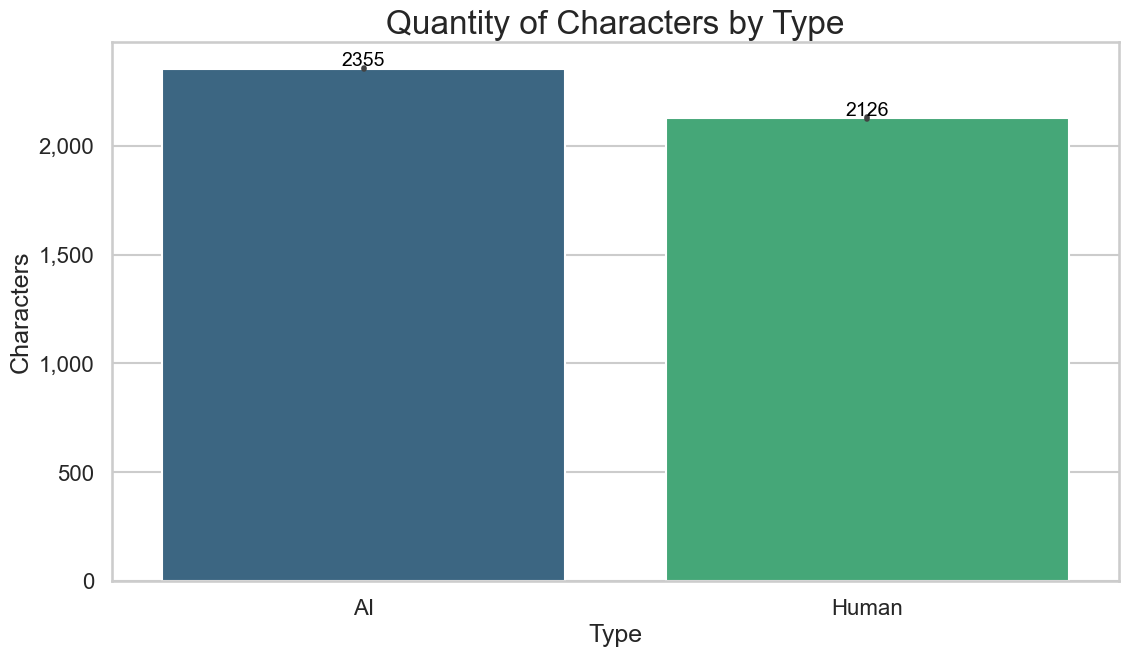

In [11]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(13, 7))
ax = sns.barplot(y='len', x='generated_cor', data=df, palette='viridis')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:0.0f}'.format(height), (p.get_x() + p.get_width() / 2., height + 5), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Quantity of Characters by Type', fontsize=24)
plt.xlabel('Type', fontsize=18)
plt.ylabel('Characters', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


# Machine Learning

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [13]:
vectorizer = TfidfVectorizer()
text = vectorizer.fit_transform(df['text'])

In [14]:
from sklearn.decomposition import TruncatedSVD


# Create a TruncatedSVD object and fit the data
svd = TruncatedSVD(n_components=50)
svd.fit(text)

# Transform the data using the TruncatedSVD
transformed_data = svd.transform(text)

# Get the explained variance ratios
explained_variance_ratios = svd.explained_variance_ratio_

print("Transformed data shape:", transformed_data.shape)
print("Explained variance ratios:", explained_variance_ratios)

Transformed data shape: (487235, 50)
Explained variance ratios: [0.01297809 0.03615888 0.02490128 0.01984776 0.01745602 0.01363267
 0.01068643 0.00950964 0.00909626 0.00811487 0.00789465 0.007262
 0.00711327 0.00623346 0.00544133 0.00507889 0.00439604 0.00409503
 0.00368128 0.00341947 0.00340267 0.00331013 0.0030995  0.00294272
 0.00284945 0.00277109 0.00263401 0.00261195 0.00249624 0.00240599
 0.00230585 0.00222985 0.00221636 0.00210707 0.00207359 0.00201013
 0.00197982 0.00191759 0.0019059  0.00187673 0.00183423 0.00176672
 0.00174067 0.00170279 0.00165877 0.00161473 0.00156438 0.00156265
 0.00148461 0.0014573 ]


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(text,df['generated_cor'],test_size=0.2) 

In [16]:
text.shape

(487235, 259050)

In [17]:
MNB = MultinomialNB()
CNB = ComplementNB()
SVC = LinearSVC()
lor = LogisticRegression()

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(text,df['generated_cor'],test_size=0.2)

In [19]:
MNB.fit(x_train,y_train)

MultinomialNB()

In [20]:
CNB.fit(x_train,y_train)

ComplementNB()

In [21]:
SVC.fit(x_train,y_train)

LinearSVC()

In [22]:
lor.fit(x_train,y_train)

LogisticRegression()

In [23]:
predictMNB = MNB.predict(x_test)
predictCNB = CNB.predict(x_test)
predictCSV = SVC.predict(x_test)
predictlor = lor.predict(x_test)

In [24]:
mnb = accuracy_score(y_test,predictMNB)
cnb = accuracy_score(y_test,predictCNB)
svc = accuracy_score(y_test,predictCSV)
lr = accuracy_score(y_test,predictlor)


In [25]:
print(f"MNB: {mnb*100:.2f}%")
print(f"CNB: {cnb*100:.2f}%")
print(f"SVC: {svc*100:.2f}%")
print(f"lor:{lr*100:.2f}%")

MNB: 94.99%
CNB: 95.66%
SVC: 99.87%
lor:99.51%


In [26]:
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, predictMNB))
print("\nClassification Report for Complement Naive Bayes:")
print(classification_report(y_test, predictCNB))
print("\nClassification Report for Support Vector Classifier:")
print(classification_report(y_test, predictCSV))
print("\nClassification Report for Logistic Regression Classifier:")
print(classification_report(y_test, predictlor))

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

          AI       0.93      0.99      0.96     61158
       Human       0.98      0.88      0.93     36289

    accuracy                           0.95     97447
   macro avg       0.96      0.94      0.95     97447
weighted avg       0.95      0.95      0.95     97447


Classification Report for Complement Naive Bayes:
              precision    recall  f1-score   support

          AI       0.95      0.98      0.97     61158
       Human       0.97      0.91      0.94     36289

    accuracy                           0.96     97447
   macro avg       0.96      0.95      0.95     97447
weighted avg       0.96      0.96      0.96     97447


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

          AI       1.00      1.00      1.00     61158
       Human       1.00      1.00      1.00     36289

    accuracy              

In [27]:
human_sentence = ["Jenna Branson is a college student suffering from mental illness. Unhappy at home, she decides to run away after becoming noncompliant with her medication."]

sen = vectorizer.transform(human_sentence)

print(lor.predict(sen))
print(MNB.predict(sen))
print(CNB.predict(sen))
print(SVC.predict(sen))

['Human']
['Human']
['Human']
['Human']


In [28]:
human_sentence = ["Every morning, the sun's golden rays bring a promise of new adventures and endless possibilities."]

sen = vectorizer.transform(human_sentence)

print(lor.predict(sen))
print(MNB.predict(sen))
print(CNB.predict(sen))
print(SVC.predict(sen))

['Human']
['AI']
['AI']
['Human']


In [29]:
from sklearn.pipeline import Pipeline


In [30]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('svd', TruncatedSVD(n_components=50)),  # Adjust n_components as needed
    ('classifier', LinearSVC())
])

In [35]:
# Fit the pipeline on the training data
pipeline.fit(df['text'], df['generated_cor'])

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('svd', TruncatedSVD(n_components=50)),
                ('classifier', LinearSVC())])

In [36]:
with open('text_classification_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

^C
